In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import subprocess
import shlex
# My module
import gen_rand
from fileinput import close

print("START")

START


### Random sets generation

In next three cells we are going:
*  Compile C++ code using comp.sh script
*  Make array of sets with randome integers
*  Run binary using sets as arguments and save amount of duplicates in 'temp.tx'

In [9]:
!sh comp.sh;

In [10]:
Obj1 = gen_rand.Rand_set(3, 1001, 1)
rand_arr = Obj1.gen_rand_prnt(ret=1)
del(Obj1)
rand_arr.shape

(998,)

In [11]:
!rm -f size_dup.txt;
!echo "Len Dup" >> size_dup.txt;

with open('size_dup.txt', "a") as outfile:
    for i in rand_arr:
        t = np.array2string(np.array(list(i)))[1:-1]
        t = "./bi_tree_bin " + t
        t = shlex.split(t)
        subprocess.run(t, stdout=outfile)

outfile.close()
del(outfile)
del(rand_arr)
del(t)

!wc -l size_dup.txt;

     999 size_dup.txt


### Dataframe

Working with data:
*  Make dataframe(df) from 'size_dup.txt' file
*  Add one more column to df with percentage of duplicates in input
*  Print three drawings :
    * Number of inputs vs amount of duplicates
    * Number of inputs vs percentage of duplicates
    * Percentage histogram

In [12]:
dDup = pd.read_table("size_dup.txt", delimiter=" ", index_col=False)
dDup['%_Perc'] = (dDup['Dup'] / dDup['Len']) * 1000
dDup['%_Perc'] = dDup['%_Perc'].astype(int) / 10
dDup.tail(5)

,Len,Dup,%_Perc
993,996,26,2.6
994,997,25,2.5
995,998,24,2.4
996,999,23,2.3
997,1000,22,2.2


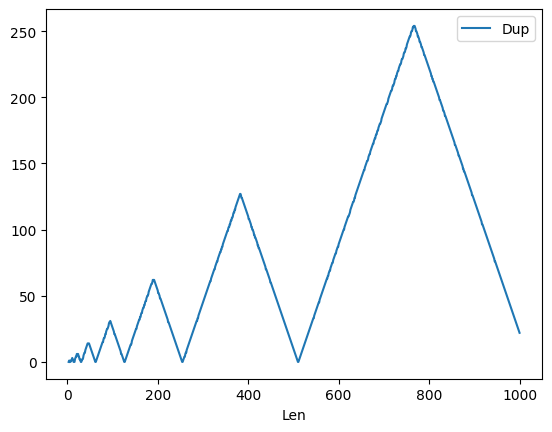

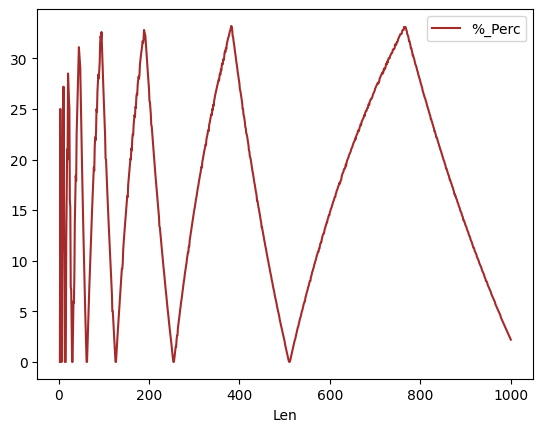

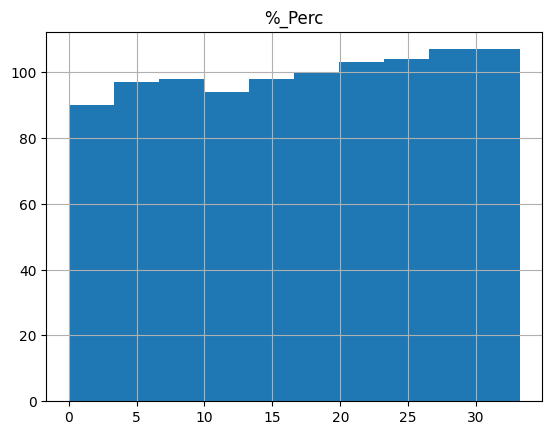

In [13]:
dDup.plot(x='Len', y='Dup')
dDup.plot.line(x='Len', y='%_Perc', color='brown')
dDup.hist(column='%_Perc')
del(dDup)

### Semi-conclusion

My algorithm, converting vector to the Binary Tree, is very unoptimized. As we see, there are a lot of duplicates. Fortunately, there are no more than two same numbers in the tree, and all duplicated numbers are leaves. There will not be a problem to clean up the tree from duplicated numbers.

This algorithm does not have constant complexity.

You can fing implimentation in *bi_tree.h* in <i>'static STRUC* gen_triple(int* iarr, int start, int finish)'</i> function.

With next steps you will see how do I work with the Binary tree.